In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('medals.csv', index_col=0, low_memory=False)

In [158]:
data.shape

(33261, 11)

In [159]:
print('Number of duplicates:', len(data) - len(data.drop_duplicates()))
data = data.drop_duplicates()
data.shape

Number of duplicates: 1552


(31709, 11)

In [160]:
# data.info()

In [161]:
# data.describe()

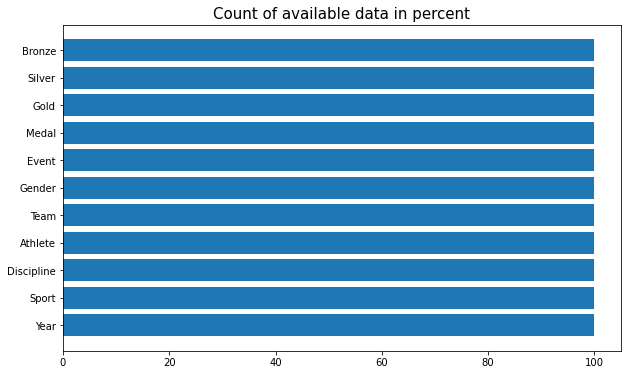

In [162]:
# Capture necessary data
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [163]:
data.head()

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0.0,1.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0.0,0.0,1.0
Athens (1896),1896.0,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0.0,1.0,0.0


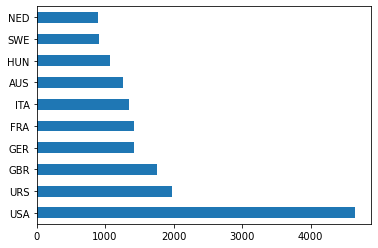

In [164]:
# Data including teams
(data['Team'].value_counts()[:10]).plot(kind='barh')

In [199]:
# Try to calculate highest gold to total medal ratio
tryout = data.groupby(['Team'])[['Gold']].count()
tryout['Gold']

Team
AFG      2
AHO      1
ALG     17
ANZ     29
ARG    279
      ... 
VIE      3
YUG    435
ZAM      2
ZIM     23
ZZX     48
Name: Gold, Length: 149, dtype: int64

In [201]:
(data['Team'].value_counts())

USA    4654
URS    1971
GBR    1765
GER    1424
FRA    1419
       ... 
MKD       1
AHO       1
HAI       1
MRI       1
BER       1
Name: Team, Length: 149, dtype: int64

In [166]:
# data.groupby(['Athlete'])[['Gold']].count()

In [167]:
# data['Gold'].value_counts()

# Question 1

In [168]:
# Filter appropraite entries
data_athletes = data[(data.Athlete != '#NAME?') & (data.Discipline == 'Athletics') 
                   & (data.Gold == 1.0)]
data_athletes

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Athletics,Athletics,Thomas Burke,USA,Men,100m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Thomas Curtis,USA,Men,110m hurdles men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Edwin Flack,AUS,Men,1500m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Thomas Burke,USA,Men,400m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Edwin Flack,AUS,Men,800m men,Gold,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Rio (2016),2016.0,Athletics,Athletics,NIEKERK Wayde Van,RSA,Unknown,400m,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,David Verburg,USA,Unknown,4x400m relay,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Zhen Wang,CHN,Unknown,20km walk,Gold,1.0,0.0,0.0


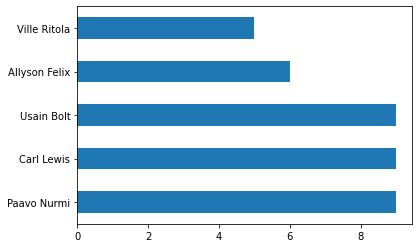

In [169]:
# get top n most frequent entries
n = 5
(data_athletes['Athlete'].value_counts()[:n]).plot(kind='barh')

In [170]:
data_athletes['Athlete'].value_counts()[:5]

Paavo Nurmi      9
Carl Lewis       9
Usain Bolt       9
Allyson Felix    6
Ville Ritola     5
Name: Athlete, dtype: int64

In [171]:
# Wikipedia says usain did not win beijing 2008 4x100?
data_athletes.loc[data_athletes['Athlete'] == 'Usain Bolt']

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,100m men,Gold,1.0,0.0,0.0
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,200m men,Gold,1.0,0.0,0.0
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,4x100m relay men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,100m men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,200m men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,4x100m relay men,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,4x100m relay,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,200m,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,100m,Gold,1.0,0.0,0.0


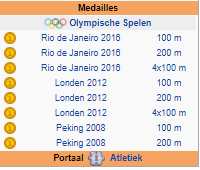

Jamaica disqualified because of doping usage, is not in the data.

# Question 2
Assumptions made: 
- Event duplicates only differ with words 'women' and 'men' (e.g. the table above has '100m men' and '100m' as entries, which in the end is the same discipline)

In [172]:
def count_different_event(df, n):
    
    # Remove words men and women, 100m men and women will be distinguished by the name of the athlete 
    df['Event'] = df['Event'].str.replace(' women','')
    df['Event'] = df['Event'].str.replace(' men','')
    
    # Make new column
    df['Athlete + Event'] = df['Athlete'] + ' ' + df['Event']
    
    # Get unique persons and unique events
    df = df.drop_duplicates(subset='Athlete + Event', keep="first")
    
#     output = df['Athlete'].value_counts()[:n]
    # Get dataframe with athletes and 
    output = df['Athlete'].value_counts()[:n].rename_axis('Athlete').reset_index(name='Different events')
    
    return output

In [173]:
# Dataframe with athletes who won a gold medal
data_events = data[(data.Athlete != '#NAME?') & (data.Discipline == 'Athletics')
                  & (data.Gold == 1.0)]

In [174]:
output_q2 = count_different_event(data_events, 10)

<ipython-input-172-9c502a242679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' women','')
<ipython-input-172-9c502a242679>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' men','')
<ipython-input-172-9c502a242679>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [175]:
output_q2

,Athlete,Different events
0,Paavo Nurmi,6
1,Ville Ritola,5
2,Hannes Kolehmainen,4
3,Betty Cuthbert,4
4,Fanny Blankers-koen,4
5,Alvin Kraenzlein,4
6,Carl Lewis,4
7,Jesse Owens,4
8,Florence Griffith-joyner,3
9,Harrison Dillard,3


In [176]:
print(output_q2['Athlete'][0])

Paavo Nurmi


# Question 3
Assumption: 
- Every event happens once every olympic games
- Team members in the same team as the person guilty of doping keep their medals

In [177]:
data_q3 = data

In [178]:
# Get first athlete with most gold medals
doping_medals1 = data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][0])]
# doping_medals1

In [179]:
# Get third athlete with most gold medals
doping_medals2 = data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][2])]
# doping_medals2

In [180]:
doping_medals = pd.concat([doping_medals1, doping_medals2], axis=0)
doping_medals

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country individual men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,1500m men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,3000m team men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country individual men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,Gold,1.0,0.0,0.0


In [181]:
# print(data_q3.Year[1])
# print(new.Year[2990])

In [182]:
# Loop over guilty earned medals
for i in range(len(doping_medals)):
    
    # Year, event make the event unique
    temp_year = doping_medals.Year[i]
    temp_event = doping_medals.Event[i]
    temp_medal = doping_medals.Medal[i]
    
#     temp_name = doping_medals.Athlete[i]
    
    # Get the team to also disqualify teammembers
#     temp_team = doping_medals.Team[i]
    
    # 
    if (temp_medal == 'Gold'):
        
        # Silver person now has gold
        data_q3.loc[(data_q3['Year'] == temp_year)
                    & (data_q3['Event'] == temp_event) 
                    & (data_q3['Silver'] == 1.0),
                    ['Medal', 'Gold', 'Silver']] = ['Gold', 1.0, 0.0]
        
        # Bronze person now has silver
        data_q3.loc[(data_q3['Year'] == temp_year)
                    & (data_q3['Event'] == temp_event) 
                    & (data_q3['Bronze'] == 1.0),
                    ['Medal', 'Silver', 'Bronze']] = ['Silver', 1.0, 0.0]
        
        # Punish teammembers of doping person
#         data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
#                     (data_q3['Gold'] == 1.0) & (data_q3['Team'] == temp_team), 
#                     ['Medal', 'Gold']] = ['None', 0.0]        
    
    # Gold stays gold, bronze becomes silver
    elif (temp_medal == 'Silver'):
        
        data_q3.loc[(data_q3['Year'] == temp_year) 
                    & (data_q3['Event'] == temp_event)
                    & (data_q3['Bronze'] == 1.0), 
                    ['Medal', 'Silver', 'Bronze']] = ['Silver', 1.0, 0.0]
        
        # Punish teammembers of doping person
#         data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
#                     (data_q3['Silver'] == 1.0) & (data_q3['Team'] == temp_team), 
#                     ['Medal', 'Silver']] = ['None', 0.0]        

    else:
        
        print('We dont know the person who finished fourth, so we just remove the name')
        
    print(data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event)])
    
        

                  Year      Sport Discipline           Athlete Team Gender  \
Games                                                                        
Antwerp (1920)  1920.0  Athletics  Athletics      James Wilson  GBR    Men   
Antwerp (1920)  1920.0  Athletics  Athletics       Paavo Nurmi  FIN    Men   
Antwerp (1920)  1920.0  Athletics  Athletics  Joseph Guillemot  FRA    Men   

                     Event   Medal  Gold  Silver  Bronze  
Games                                                     
Antwerp (1920)  10000m men  Silver   0.0     1.0     0.0  
Antwerp (1920)  10000m men    Gold   1.0     0.0     0.0  
Antwerp (1920)  10000m men    Gold   1.0     0.0     0.0  
                  Year      Sport Discipline           Athlete Team Gender  \
Games                                                                        
Antwerp (1920)  1920.0  Athletics  Athletics      Erik Backman  SWE    Men   
Antwerp (1920)  1920.0  Athletics  Athletics  Joseph Guillemot  FRA    Men   
An

Amsterdam (1928)  10000m men    Gold   1.0     0.0     0.0  
                    Year      Sport Discipline              Athlete Team  \
Games                                                                      
Amsterdam (1928)  1928.0  Athletics  Athletics         Ove Andersen  FIN   
Amsterdam (1928)  1928.0  Athletics  Athletics  Toivo Aarne Loukola  FIN   
Amsterdam (1928)  1928.0  Athletics  Athletics          Paavo Nurmi  FIN   

                 Gender                   Event   Medal  Gold  Silver  Bronze  
Games                                                                          
Amsterdam (1928)    Men  3000m steeplechase men  Silver   0.0     1.0     0.0  
Amsterdam (1928)    Men  3000m steeplechase men    Gold   1.0     0.0     0.0  
Amsterdam (1928)    Men  3000m steeplechase men  Silver   0.0     1.0     0.0  
                    Year      Sport Discipline       Athlete Team Gender  \
Games                                                                      
Amster

In [189]:
# data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][0])]

# Check whether the silver place is gold now
data_q3.loc[(data_q3['Event'] == '10000m men') & (data_q3['Year'] == 1920.0) & (data_q3['Medal'] == 'Gold')]

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Joseph Guillemot,FRA,Men,10000m men,Gold,1.0,0.0,0.0


In [184]:
# Remove rows with name of first and third athlete from question 2
new_data = data_q3[(data_q3.Athlete != output_q2['Athlete'][0])
                   & (data_q3.Athlete != output_q2['Athlete'][2])]

In [185]:
new_data

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0.0,1.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0.0,0.0,1.0
Athens (1896),1896.0,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Rio (2016),2016.0,Weightlifting,Weightlifting,Alexandr Zaichikov,KAZ,Unknown,+ 105kg,Bronze,0.0,0.0,1.0
Rio (2016),2016.0,Sailing,Sailing,Thomas Zajac,AUT,Unknown,0.5-1t,Bronze,0.0,0.0,1.0
Rio (2016),2016.0,Wrestling,Wrestling Freestyle,Fengliu Zhang,CHN,Unknown,67.5 - 75kg (middleweight),Bronze,0.0,0.0,1.0


In [191]:
# Write filtered data
new_data.to_csv('medals_doping.csv')

In [187]:
# Dataframe with athletes obtaining a gold medal
data_athletes_new = new_data[(new_data.Athlete != '#NAME?')
                             & (new_data.Discipline == 'Athletics')
                             & (new_data.Gold == 1.0)]

In [188]:
count_different_event(data_athletes_new, 10)

<ipython-input-172-9c502a242679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' women','')
<ipython-input-172-9c502a242679>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' men','')
<ipython-input-172-9c502a242679>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Athlete,Different events
0,Ville Ritola,6
1,Fanny Blankers-koen,4
2,Alvin Kraenzlein,4
3,Jesse Owens,4
4,Betty Cuthbert,4
5,Carl Lewis,4
6,Harry Hillman,3
7,James Lightbody,3
8,Allyson Felix,3
9,Emil Zatopek,3
